### Exploratory Data Analysis (AMEO Data)
`Prasad Jadhav`

#### Introduction of Dataset

<p><span style="color:gray">The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.</span></p>

#### Objective

<p style="color:gray">The objective is to perform Exploratory Data Analysis (EDA) on the given dataset of Aspiring Mind Employment Outcome (AMEO).</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import t, norm
import statistics
from scipy.stats import chi2
from scipy.stats import chi2_contingency

sns.set(style='whitegrid', color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('aspiring_minds_employability_outcomes_2015.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
pd.set_option('display.max_columns',100)
df.shape

(3998, 38)

In [4]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,06-01-2012 00:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,09-01-2013 00:00,present,assistant manager,Indore,m,10-04-1989 00:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,06-01-2014 00:00,present,systems engineer,Chennai,f,08-03-1992 00:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,07-01-2011 00:00,present,senior software engineer,Gurgaon,m,12-05-1989 00:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,03-01-2014 00:00,03-01-2015 00:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.tail()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,47916,280000,10-01-2011 00:00,10-01-2012 00:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,07-01-2013 00:00,07-01-2013 00:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,07-01-2013 00:00,present,associate software engineer,Bangalore,m,07-03-1991 00:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,07-01-2014 00:00,01-01-2015 00:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,324966,400000,02-01-2013 00:00,present,senior systems engineer,Chennai,f,2/26/91 0:00,70.60,cbse,2008,68.00,cbse,6609,2,B.Tech/B.E.,information technology,68.00,6609,1,Tamil Nadu,2012,565,515,464,0.600057,435,-1,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [6]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 3998
Number of Columns: 38


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscienti

In [11]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

### Statistical Analysis

In [12]:
df.cov()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.319275e+11,-1.910842e+10,159378.051803,404276.838583,28243.078928,4.963137e+08,3349.438212,139854.366484,4.963137e+08,-5991.252230,318657.441421,5.164917e+06,3.221944e+06,-2.449201e+06,-21387.520774,1.406654e+06,-6.644284e+06,3.072515e+07,-931869.041883,3.322958e+06,-1.876479e+06,-237952.207851,65593.400265,8496.058635,41809.257150,-53537.564434,11482.092235
Salary,-1.910842e+10,4.525724e+10,371684.456159,-56771.565543,398412.208861,-1.212565e+08,-10005.790486,226052.995923,-1.212565e+08,1500.495432,-68131.858023,3.978683e+06,3.309785e+06,6.000532e+06,10434.572414,5.053027e+06,2.240082e+04,-3.755551e+06,385652.660706,-8.868903e+05,-5.061435e+05,293530.550489,-14037.983625,11504.821563,-2067.186195,-11721.817357,-2425.975501
10percentage,1.593781e+05,3.716845e+05,97.025700,4.397119,69.710710,9.972611e+02,-0.325618,25.143547,9.972611e+02,0.527071,-4.330051,3.625933e+02,2.701381e+02,3.826606e+02,0.362683,1.084215e+02,1.327694e+02,-3.268791e+01,48.678119,6.420377e+01,5.099856e+01,10.833465,0.685534,1.267615,-0.043855,-1.314998,0.364343
12graduation,4.042768e+05,-5.677157e+04,4.397119,2.734391,4.714096,2.017185e+03,0.012009,1.161489,2.017185e+03,-0.002287,0.761563,2.566921e+01,1.519525e+01,2.788676e-01,-0.026476,-1.629797e+01,-1.541392e+00,8.504783e+01,5.753526,1.792305e+01,4.069324e+00,-0.286551,0.175763,0.064135,0.097479,-0.123908,-0.025119
12percentage,2.824308e+04,3.984122e+05,69.710710,4.714096,120.998528,1.179912e+03,-0.290720,31.096999,1.179912e+03,0.657967,-4.532195,2.457441e+02,2.325150e+02,4.202944e+02,0.382008,1.825586e+02,2.038504e+02,-8.393252e+01,40.621034,6.166074e+01,5.098068e+01,2.383094,0.659664,1.077373,-0.078347,-1.045919,0.070213
CollegeID,4.963137e+08,-1.212565e+08,997.261052,2017.184639,1179.911862,2.306172e+07,84.454309,676.167910,2.306172e+07,17.079669,-26.384577,-1.148619e+04,-1.962685e+04,-6.735002e+04,-166.228698,-3.329351e+04,-1.553103e+04,8.610934e+04,-4378.244435,9.645816e+03,1.290070e+04,1012.081362,377.568165,-23.806085,27.034147,-43.417151,-51.690285
CollegeTier,3.349438e+03,-1.000579e+04,-0.325618,0.012009,-0.290720,8.445431e+01,0.068786,-0.185889,8.445431e+01,-0.012204,-0.046429,-5.059851e+00,-4.160910e+00,-8.054460e+00,-0.007552,-3.966342e+00,-1.310348e+00,4.840737e-02,-0.554542,5.959109e-02,1.999373e-04,-0.324218,0.014885,-0.009400,0.002488,0.006284,-0.005071
collegeGPA,1.398544e+05,2.260530e+05,25.143547,1.161489,31.096999,6.761679e+02,-0.185889,66.705404,6.761679e+02,0.065421,2.265281,9.126029e+01,1.393548e+02,2.171377e+02,0.410539,2.291001e+02,3.858473e+01,1.088097e+01,-25.456707,3.738237e+01,-4.475103e+00,-5.673773,0.584587,0.525213,-0.253988,-0.616035,0.231115
CollegeCityID,4.963137e+08,-1.212565e+08,997.261052,2017.184639,1179.911862,2.306172e+07,84.454309,676.167910,2.306172e+07,17.079669,-26.384577,-1.148619e+04,-1.962685e+04,-6.735002e+04,-166.228698,-3.329351e+04,-1.553103e+04,8.610934e+04,-4378.244435,9.645816e+03,1.290070e+04,1012.081362,377.568165,-23.806085,27.034147,-43.417151,-51.690285
CollegeCityTier,-5.991252e+03,1.500495e+03,0.527071,-0.002287,0.657967,1.707967e+01,-0.012204,0.065421,1.707967e+01,0.210212,0.119072,2.427936e+00,8.098178e-01,4.427808e-01,0.001988,6.051422e+00,2.980629e+00,-8.552884e-01,-2.357183,4.140691e-01,2.397733e+00,-0.561244,0.006963,0.002403,-0.003578,0.002052,-0.007760


In [13]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,0.027539,0.135505,0.102215,-0.055134,-0.125639,0.018859,-0.115601,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,-0.010053,0.178219,0.179275,0.230627,0.104656,0.115665,0.000665,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,-0.013799,0.350780,0.316014,0.317640,0.078563,0.053600,0.085179,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,0.014457,0.147925,0.105887,0.001379,-0.034163,-0.047995,-0.005891,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,-0.012933,0.212888,0.243571,0.312413,0.074099,0.080818,0.117112,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,-0.000172,-0.022792,-0.047094,-0.114672,-0.073857,-0.033760,-0.020438,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,-0.005557,-0.183843,-0.182811,-0.251103,-0.061436,-0.073644,-0.031573,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,0.008706,0.106478,0.196610,0.217380,0.107252,0.136596,0.029855,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,-0.000172,-0.022792,-0.047094,-0.114672,-0.073857,-0.033760,-0.020438,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,0.008152,0.050462,0.020353,0.007896,0.009250,0.064272,0.041083,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


In [14]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [15]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [16]:
df['Salary'].value_counts()

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64

In [17]:
df['JobCity'].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [18]:
df['DOJ'].value_counts()

07-01-2014 00:00    199
06-01-2014 00:00    180
08-01-2014 00:00    178
09-01-2014 00:00    142
01-01-2014 00:00    142
                   ... 
11-01-2015 00:00      1
11-01-2009 00:00      1
08-01-2004 00:00      1
09-01-2009 00:00      1
02-01-2007 00:00      1
Name: DOJ, Length: 81, dtype: int64

In [19]:
df['DOL'].value_counts()

present             1875
04-01-2015 00:00     573
03-01-2015 00:00     124
05-01-2015 00:00     112
01-01-2015 00:00      99
                    ... 
03-01-2005 00:00       1
10-01-2015 00:00       1
02-01-2010 00:00       1
02-01-2011 00:00       1
10-01-2010 00:00       1
Name: DOL, Length: 67, dtype: int64

In [20]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [21]:
df['DOB'].value_counts()

01-01-1991 00:00    11
7/15/91 0:00        10
07-05-1991 00:00     8
12/13/91 0:00        8
06-03-1991 00:00     8
                    ..
12/30/92 0:00        1
10/20/86 0:00        1
11/17/89 0:00        1
9/30/92 0:00         1
4/15/87 0:00         1
Name: DOB, Length: 1872, dtype: int64

In [22]:
df['10percentage'].value_counts()

78.00    76
82.00    71
85.00    67
76.00    66
80.00    65
         ..
82.56     1
87.04     1
81.14     1
61.75     1
78.72     1
Name: 10percentage, Length: 851, dtype: int64

In [23]:
df['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
62.00    58
68.00    58
         ..
58.50     1
74.45     1
95.41     1
83.58     1
82.55     1
Name: 12percentage, Length: 801, dtype: int64

In [24]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [25]:
df['collegeGPA'].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
71.68      1
73.15      1
90.01      1
71.36      1
70.42      1
Name: collegeGPA, Length: 1282, dtype: int64

In [26]:
df['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

#### Checking Outliers

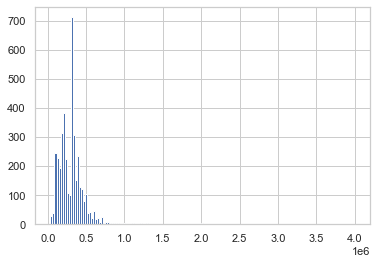

In [27]:
df['Salary'].hist(bins=150)
plt.show()

#### Observation
    
- Above salary histogram plot is right skewed and it needs to be normalized.
- This column has extreme low value outliers.

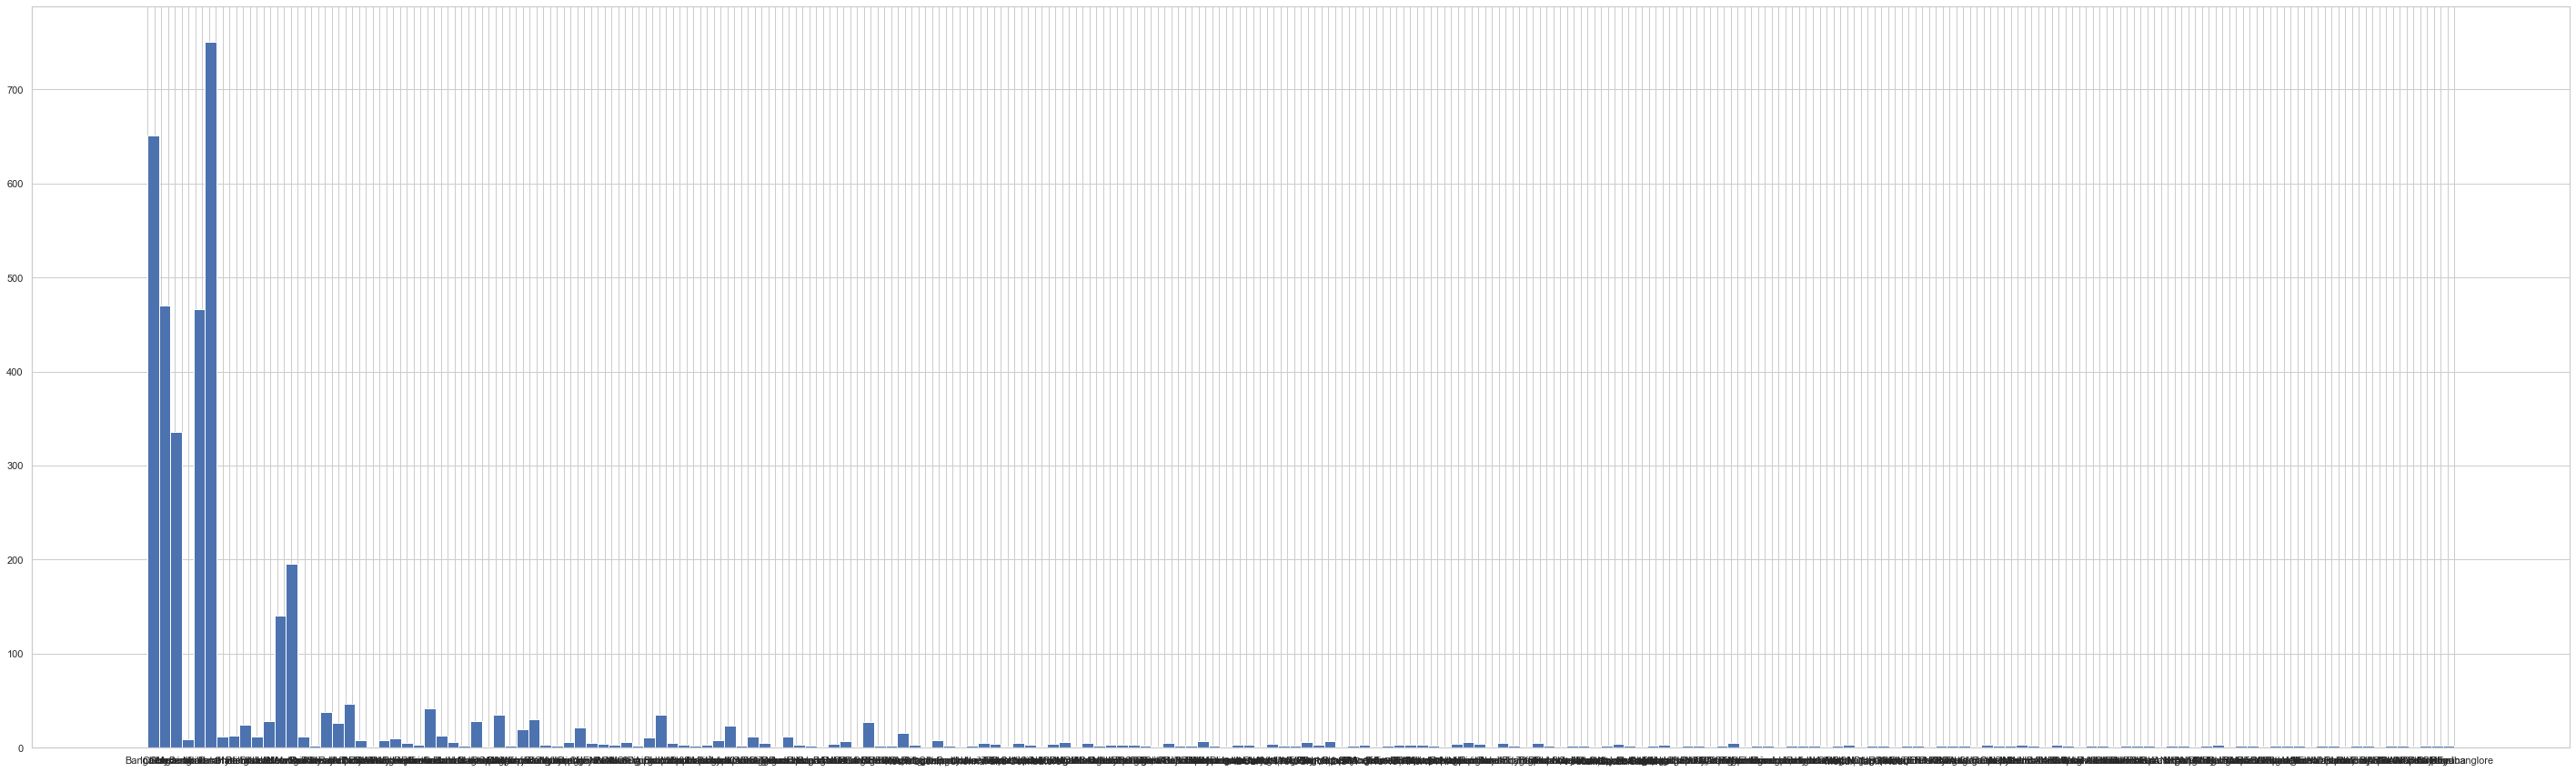

In [28]:
df['JobCity'].hist(bins=200, figsize= (50,15))
plt.show()

#### Observation

- Above JobCity histogram plot is right skewed and it needs to be normalized.
- This column has extreme low value outliers.

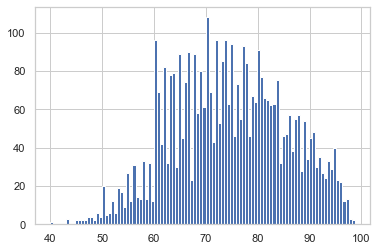

In [29]:
df['12percentage'].hist(bins=100)
plt.show()

#### Observation

- Above 12percentage histogram plot has normal distribution.
- This column has extreme low value outlier at right.

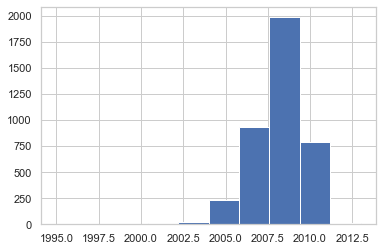

In [30]:
df['12graduation'].hist()
plt.show()

#### Observation

- Above 12graduation histogram plot is left skewed and it needs to be normalized.
- This column has no outlier.

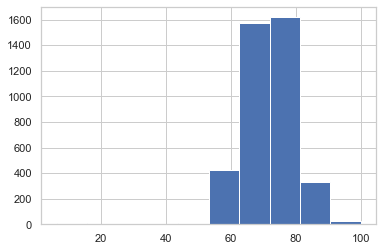

In [31]:
df['collegeGPA'].hist()
plt.show()

#### Observation

- Above collegeGPA histogram plot is left skewed and it needs to be normalized.
- This column has no outlier.

In [32]:
df.pivot_table(values='Salary',index='Degree')

,Salary
Degree,
B.Tech/B.E.,308622.702703
M.Sc. (Tech.),320000.000000
M.Tech./M.E.,366132.075472
MCA,280802.469136


#### Observation

- Above view show the salary of certain degrees.

In [33]:
df.pivot_table(values='Salary',index='Designation')

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


#### Observation

- Above view show the salary wrt certain designations.

### Data Cleaning

In [34]:
df['JobCity']= df['JobCity'].str.replace('-1','Others')

In [35]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', 'Others',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurga

#### Observation

- With the above command we replace row value.
- Checking all the unique row values.

In [36]:
df['JobCity'].value_counts()

Bangalore           627
Others              461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [37]:
df['JobCity'].apply(lambda x : 'Bangalore' if x == 'BANGLORE' or x == 'BANGALORE' or x == 'Asifabadbanglore' or x == 'Banaglore' 
                    or x == 'bangalore' or x == 'Banglore' or x == 'BAngalore' or x == 'Banagalore' or x == 'Mangalore' or x == 'bengaluru' 
                    or x == 'banagalore' or x == 'banaglore' or x == 'Bengaluru' or x == 'Chennai, bangalore' or x == 'chennai,bangalore' 
                    or x == 'Asifabadbangalore' or x == ' bangalore' else
                    
                    'Noida' if x == 'noida' or x == 'NOIDA' or x == 'Nouda' or x == 'A-64,sec-64,noida' or x == 'Greater Noida' 
                    or x == 'noida ' or x == 'greater noida' or x == 'nouda' or x == 'a-64,sec-64,noida' or x == 'Greater noida' 
                    or x == 'GREATER NOIDA' else
                    
                    'new delhi' if x == 'delhi' or x == 'new dehli' or x == 'new delhi/ncr' or x == 'ncr' or x == 'new new delhi' 
                    or x == 'gaziabaad' or x == 'gajiabaad' or x == 'ghaziabad' or x == 'guragaon' or x == 'gurgoan' or x == 'gurgaon' 
                    or x == 'new delhi - jaisalmer' or x == 'new delhi ' or x == ' new delhi' or x == 'indirapuram,new delhi' or x == ' Delhi' 
                    or x == 'Delhi/NCR' else
                    
                    "Hyderabad" if x == "hderabad" or x=="hyderabad(bhadurpally)" or x=="Hyderabad " or x=="navi mumbai , hyderabad" 
                    or x=="hyderabad " or x=="hyderabad" else
                    
                    "Pune" if x == "punr" or x=="pune " or x==" pune" or x==" Pune" else 
                    
                    "mumbai" if x=="Navi Mumbai" or x=="mumbai , hyderabad" or x=="THANE" or x=="Thane" or x=="Mumbai" or x=="MUMBAI" 
                    or x==" mumbai" or x=="NAVI MUMBAI" or x=="Navi Mumbai , Hyderabad" or x=="thane" 
                    or x=="Khopoli" or x=="Navi mumbai" or x==" Mumbai" or x=="mumbai " or x=="Navimumbai" 
                    or x=="mumbai , Hyderabad" else
                    
                    "chennai" if x==" chennai" or x=="kochi/cochin,chennai and coimbatore" or x=="chennai " or x=="chennai & mumbai" 
                    or x=="chennai& mumbai" or x=="Chennai, Bangalore" or x=="Coimbatore" or x=="Kochi/Cochin" or x=="Kochi/Cochin, Chennai and Coimbatore"
                    or x=="Chennai & Mumbai" or x==" Chennai" else
                    
                    "north region" if x=="maharajganj" or x=="rewari" or x=="panchkula" or x=="lucknow" or x=="una" or x=="kanpur " 
                    or x=="faridabad" or x=="haridwar" or x=="unnao" or x=="dehradun" or x=="rudrapur" or x=="dharamshala" 
                    or x=="hissar" or x=="gurga" or x=="chandigarh" or x=="pantnagar" or x=="lucknow " or x=="ludhiana" 
                    or x=="muzaffarnagar" or x=="gagret" or x=="bareli" or x=="kanpur" or x=="dharuhera" or x=="meerut" or x=="agra" 
                    or x=="rohtak" or x=="jaspur" or x=="shimla" or x=="jammu" or x=="jhajjar" or x=="Jhajjar" or x=="nalagarh" or x=="chandigarh " 
                    or x=="joshimath" or x=="bathinda" or x=="kala amb " or x=="karnal" or x=="baddi hp" or x=="bahadurgarh" 
                    or x=="varanasi" or x=="shahibabad" or x=="ambala" or x=="Ambala City" or x=="roorkee" or x=="allahabad" or x=="Allahabad" or x=="panchkula " 
                    or x=="jalandhar" or x=="phagwara" or x=="yamuna nagar" or x=="sampla" or x=="mainpuri" or x=="rae bareli" 
                    or x=="patiala" or x=="gorakhpur" or x=="rajpura"or x=="haryana" or x=="bulandshahar" or x=="sonipat" or x=="gonda"
                    or x=="yamnorth zone nagar" or x=="manesar" or x=="jhansi" or x=="rae north zone" or x=="north zone " else
                    
                    "south region" if x=="mysore" or x=="trivandrum" or x=="Trivandrum" or x=="Technopark, Trivandrum" or x=="coimbatore" or x=="visakhapatnam" 
                    or x=="vsakhapttnam" or x=="kochi/cochin" or x=="mysore " or x=="kochi" or x=="tirupathi" or x=="tirunelvelli" 
                    or x=="tornagallu" or x=="madurai" or x=="cheyyar" or x==" ariyalur" or x=="calicut" or x=="miryalaguda" or x=="trichy" 
                    or x=="kundankulam" or x=="ongole" or x=="ernakulam" or x=="muvattupuzha" or x=="orissa" or x=="mettur" or x=="kurnool" or x=="rayagada, odisha" or x=="nellore" 
                    or x=="vellore" or x=="Vellore" or x=="Nellore" or x=="pondycherry" or x=="secunderabad" or x=="Miryalaguda" or x=="gorakhpur" or x=="hubli" or x=="kakinada" or x=="gulbarga" 
                    or x=="pondy" or x=="keral" or x=="bellary" or x=="Bellary" or x=="hospete" or x=="Hospete" or x=="vandavasi" or x=="salem" or x=="dharmapuri" or x=="belgaum" 
                    or x=="nagari" or x=="trichur" or x=="vijayawada" or x=="south zone " or x=="pondi" or x=="TRIVANDRUM" else
                    
                    "east region" if x=="bhubaneshwar" or x=="Bhubaneswar" or x=="Bhubaneshwar" or x=="dhanbad" or x=="bhagalpur" or x=="bankura" or x=="siliguri " or x=="Siliguri" or x=="jamshedpur" 
                    or x=="ranchi" or x=="siliguri" or x=="angul" or x=="jowai" or x=="ganjam" or x=="chandrapur" 
                    or x=="patna" or x=="burdwan" or x=="east zone " or x=="nagari" or x=="durgapur" or x=="rayagada" 
                    or x=="howrah" or x=="bihar" or x=="baripada" or x=="guwahati" or x=="rourkela" or x=="haldia" or x=="muzaffarpur" or x=="muzzafarpur"
                    or x=="visakhaeast zonem" or x=="sambalpur" or x=="kharagpur" else
                    
                    "west region" if x=="Jaipur" or x=="jaipur" or x=="ahmedabad" or x=="nagpur" or x=="nashik" or x=="kolhapur" 
                    or x=="rajasthan" or x=="SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN" or x=="bhiwadi" or x=="rajkot" or x=="daman and diu"
                    or x=="Daman and Diu" or x=="gandhi nagar" or x=="beawar" 
                    or x=="alwar" or x=="jodhpur" or x=="udaipur" or x=="aurangabad" or x=="neemrana" or x=="ahmednagar" or x=="gandhinagar" 
                    or x=="sadulpur" or x=="nanded" or x=="Nanded" or x=="bharuch" or x=="ratnagiri" or x=="Ratnagiri" or x=="jamnagar" or x=="kota" or x=="surat" or x=="vapi" 
                    or x=="pilani" or x=="PILANI" or x=="dausa" or x=="Dausa" or x=="latur (maharashtra )" or x=="latur (Maharashtra )" or x=="karad" or x=="bundi" or x=="vadodara" or x=="mohali" 
                    or x=="West Zone " or x=="jAipur" or x=="Jaipur" else
                    
                    "central region" if x=="indore" or x=="bhopal" or x=="raigarh" or x=="jabalpur" or x=="jagdalpur" or x=="Jagdalpur" or x=="gwalior" 
                    or x=="bareli" or x=="bilaspur" or x=="shahdol" or x=="bhopal " or x=="bhilai" or x=="singaruli" 
                    or x=="Central Zone " or x=="india" or x=="raipur" or x=="Central Zone " else
                    
                    "Abroad" if x=="australia" or x=="dubai" or x=="am" or x=="al jubail,saudi arabia" or x=="kalmar, sweden" 
                    or x=="jeddah saudi arabia" or x=="johannesburg" or x=="london" or x=="ras al khaimah" or x=="dammam" 
                    or x=="dAbroadmAbroad" or x=="LONDON" or x=="Australia" else x).value_counts()

Bangalore                 677
Others                    461
Noida                     417
Hyderabad                 364
Pune                      293
                         ... 
Bareli                      1
Rajasthan                   1
Gwalior                     1
Indirapuram, Ghaziabad      1
Pilani                      1
Name: JobCity, Length: 223, dtype: int64

#### Observation

- With the above command we concatenate some rows with relevant row value.
- Through this the unique row value get reduced.

In [38]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [39]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [40]:
df['Specialization'].apply(lambda x : "chemical engineering" if x == "chemical engineering" or x == "polymer technology" else
                           
                           "computer science" if x=="information science" or x=="computer networking" or x=="computer and communication engineering" 
                           or x=="computer science" or x=="information & communication technology" or x=="electronics and computer engineering" 
                           or x=="computer science and technology" or x=="information science engineering" or x=="computer application"
                           or x=="computer engineering" else
                           
                           "mechanical engineering" if x=="mechanical engineering" or x=="mechanical & production engineering"
                           or x=="internal combustion engine" or x=="ceramic engineering" or x=="metallurgical engineering"
                           or x=="mechatronics" or x=="automobile/automotive engineering" or x=="mechanical and automation"
                           or x=="industrial & production engineering" or x=="industrial & management engineering" else
                           
                           "electronics and electrical engineering" if x=="electronics and electrical engineering" 
                           or x=="electronics & telecommunications" or x=="electrical engineering" or x=="electronics engineering"
                           or x=="electrical and power engineering" or x=="electronics" or x=="power systems and automation"
                           or x=="embedded systems technology" else
                           
                           "instrumentation and control engineering" if x=="instrumentation and control engineering"
                           or x=="electronics & instrumentation eng" or x=="electronics and instrumentation engineering"
                           or x=="applied electronics and instrumentation" or x=="instrumentation engineering" 
                           or x=="control and instrumentation engineering" else x).value_counts()

computer science                             887
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
electronics and electrical engineering       423
mechanical engineering                       231
instrumentation and control engineering       93
civil engineering                             29
biotechnology                                 15
other                                         13
chemical engineering                          10
telecommunication engineering                  6
aeronautical engineering                       3
industrial engineering                         2
biomedical engineering                         2
Name: Specialization, dtype: int64

#### Observation

- With the above command we concatenate some rows with relevant row value.
- Through this the unique row value get reduced.

In [41]:
df['Salary'].unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,   80000,  330000,
        380000,  110000,  205000,   95000,  390000,   60000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000,  100000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000, 1200000,  675000,  105000,  195000,  385000,  235000,
        615000,  290000,  140000,  405000, 1860000,  375000,  430000,
        660000,   70000,  410000,  550000,   35000,  115000,  415000,
        265000,  285000,  245000,  395000,  560000,  700000,  185000,
        160000,  625000,   85000,  135000,  785000,  210000,  155000,
        355000,  535000,  690000,  260000, 1110000, 1000000,  505000,
        475000,  715

In [42]:
df['Salary'].value_counts()

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64

#### Observation

- With the above command, the unique row values shown.

In [43]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [44]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

#### Observation

- With the above command, the unique row values shown.

### Univariate Analysis

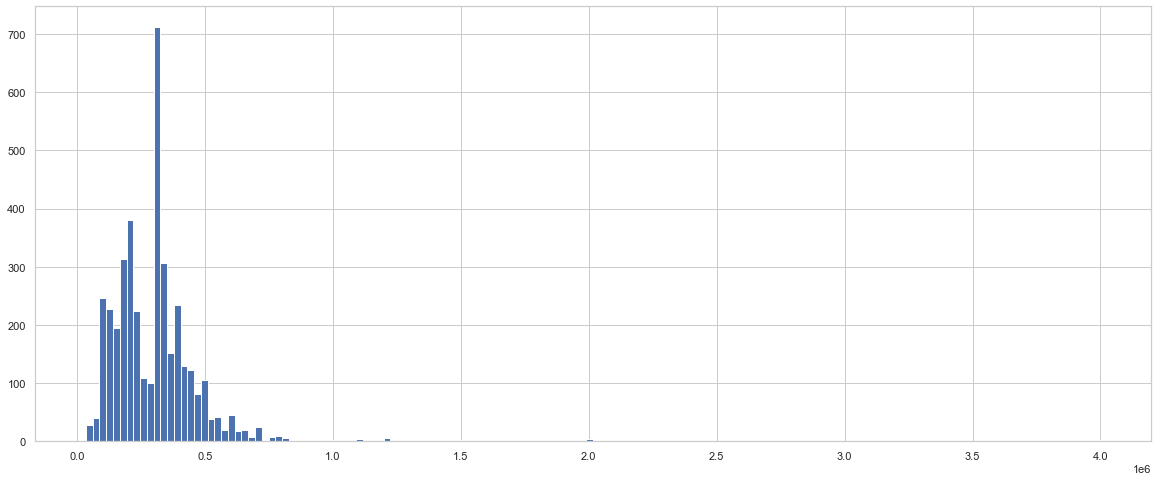

In [45]:
df['Salary'].hist(bins=150, figsize=(20,8))
plt.show()

#### Observation

- Column salary histogram show that the graph is right skewed.
- This column has many extreme low value outliers.

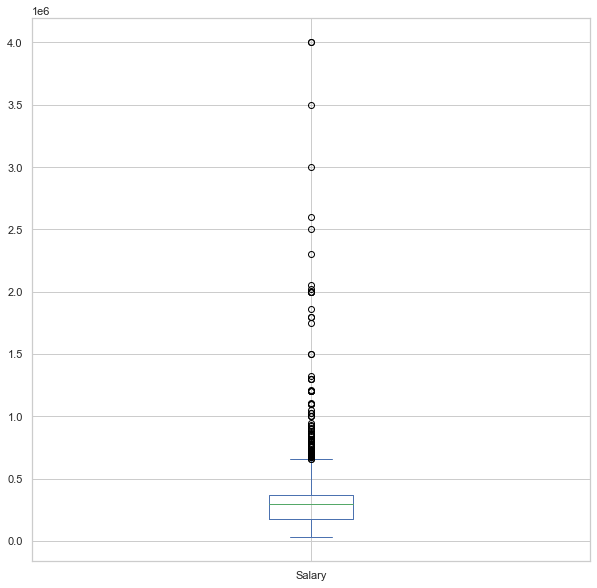

In [46]:
df['Salary'].plot(kind="box", figsize=(10,10))
plt.show()

#### Observation

- Both the whiskers are not of same length.
- Upper whisker stretched more.
- This column has so many ouliers.
- The value get centered at 0.4.

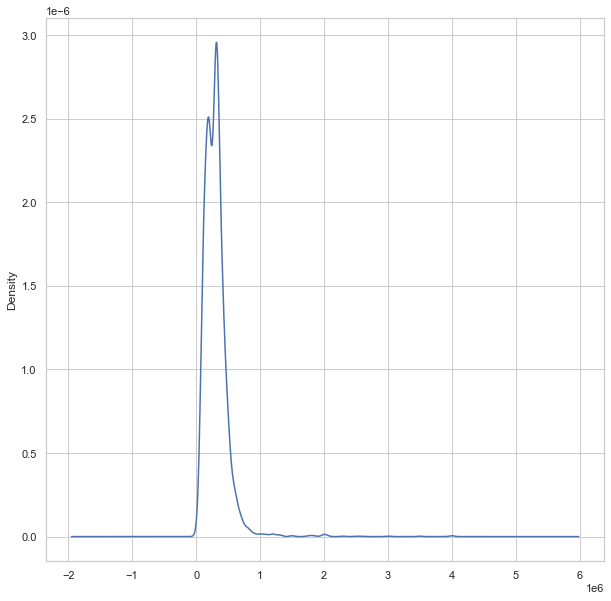

In [47]:
df['Salary'].plot(kind="kde", figsize=(10,10))
plt.show()

#### Observation

- Column having bimodal data.
- y-axis shows the relative frequency.

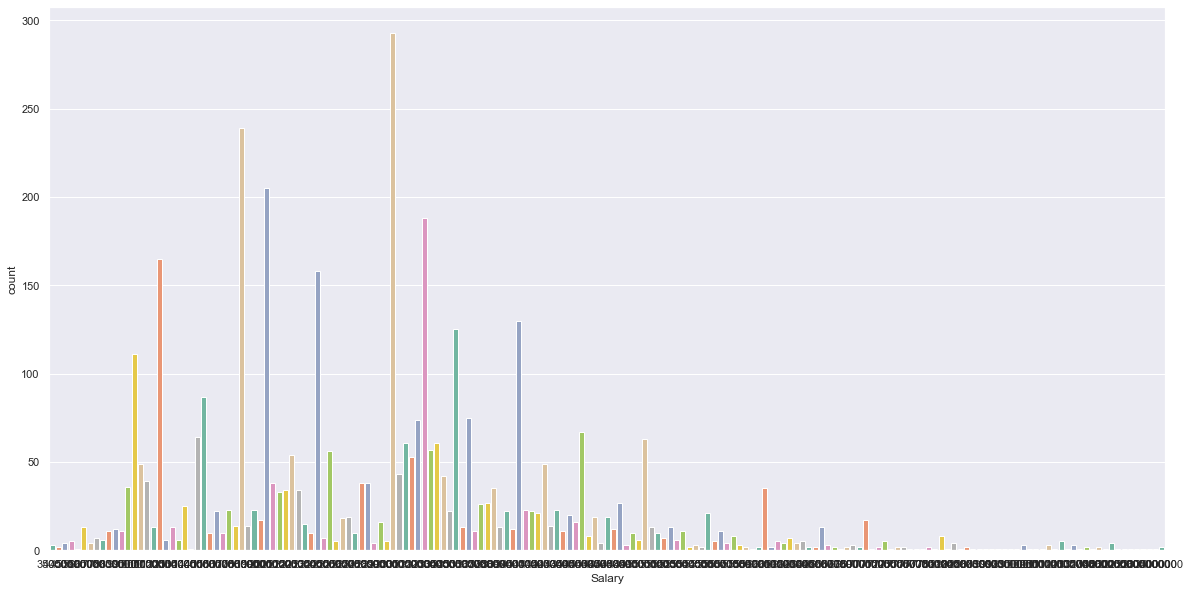

In [48]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=df['Salary'], palette='Set2')
plt.show()

#### Observation

- Column having number of records by each category.

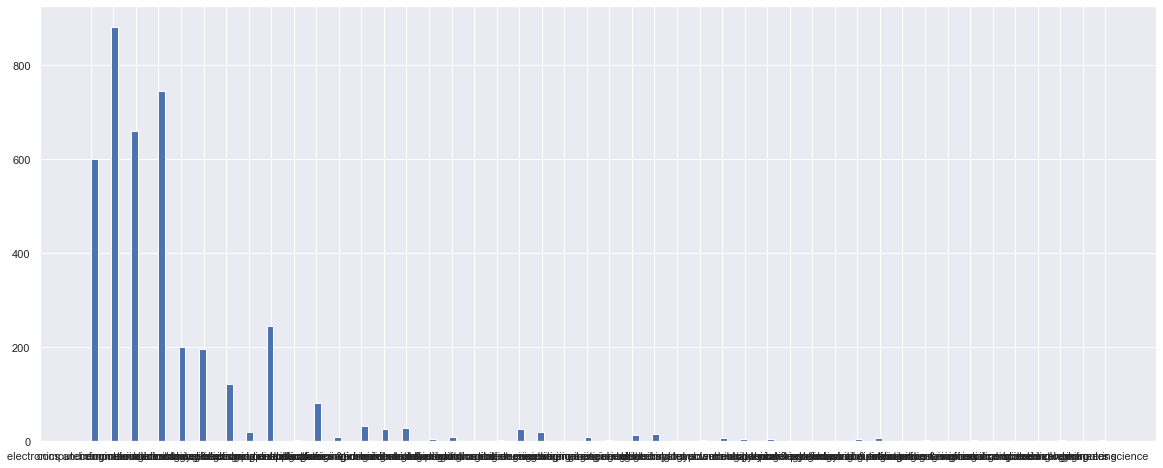

In [49]:
df['Specialization'].hist(bins=150, figsize=(20,8))
plt.show()

#### Observation

- The graph is right skewed and need to be normalized.
- It has extreme low value outliers.

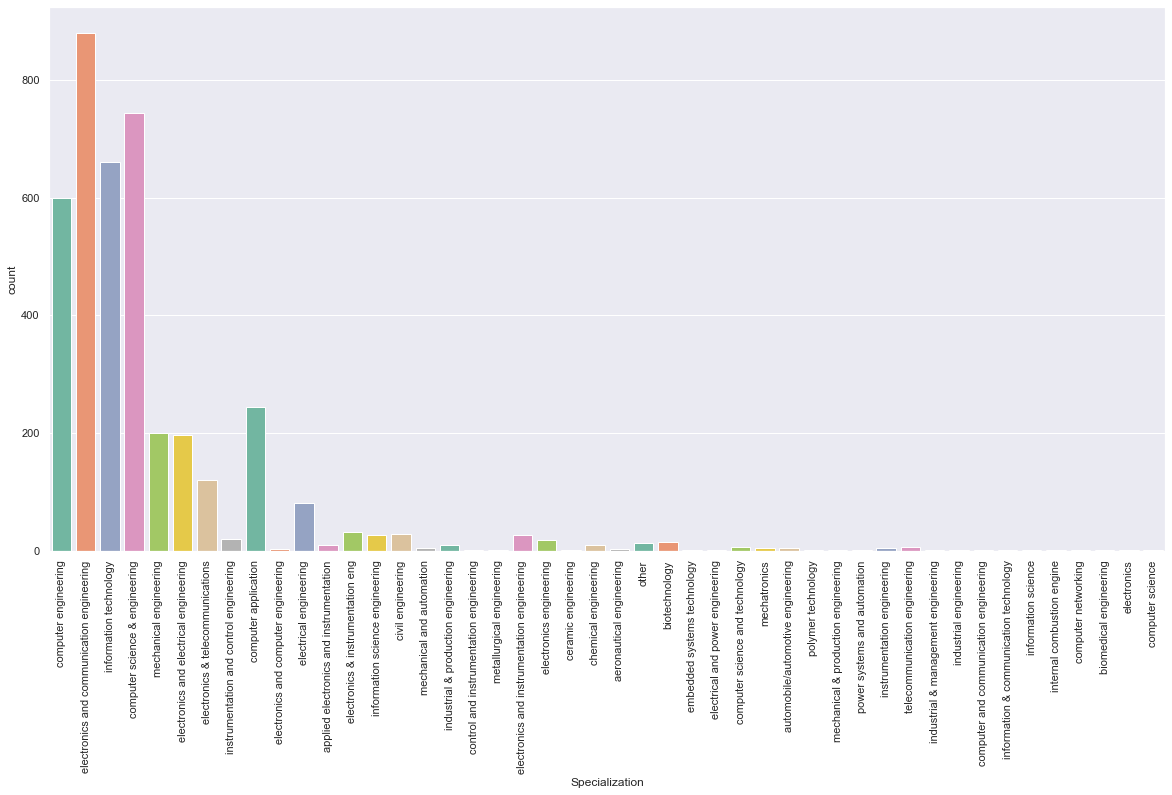

In [50]:
a4_dims = (20,10)
fig, ax = plt.subplots(figsize=a4_dims)
l = sns.countplot(data=df, x='Specialization', palette='Set2')
l.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Observation

- The graph shows the records of each row by its unique value.

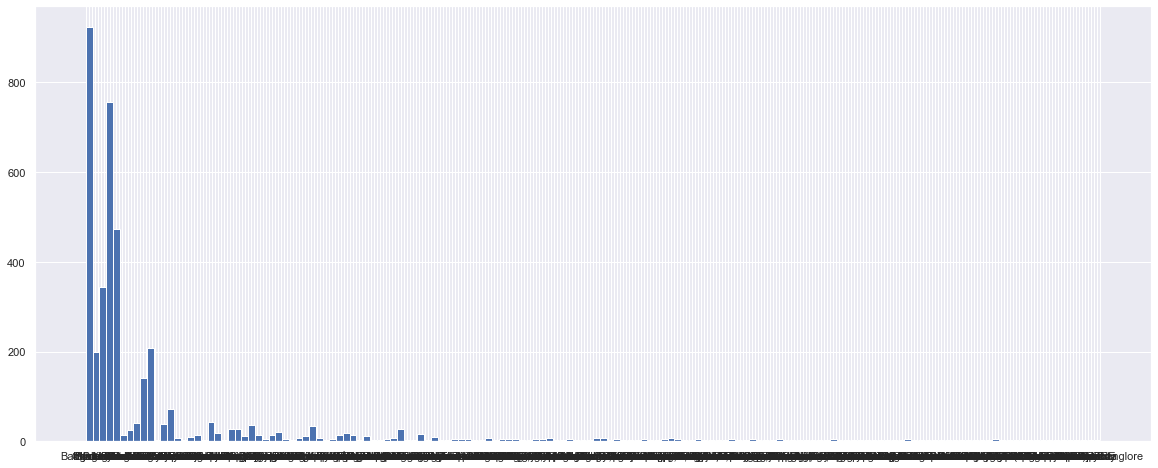

In [51]:
df['JobCity'].hist(bins=150, figsize=(20,8))
plt.show()

#### Observation

- The graph is right skewed and need to be normalized.
- Column has many outliers.

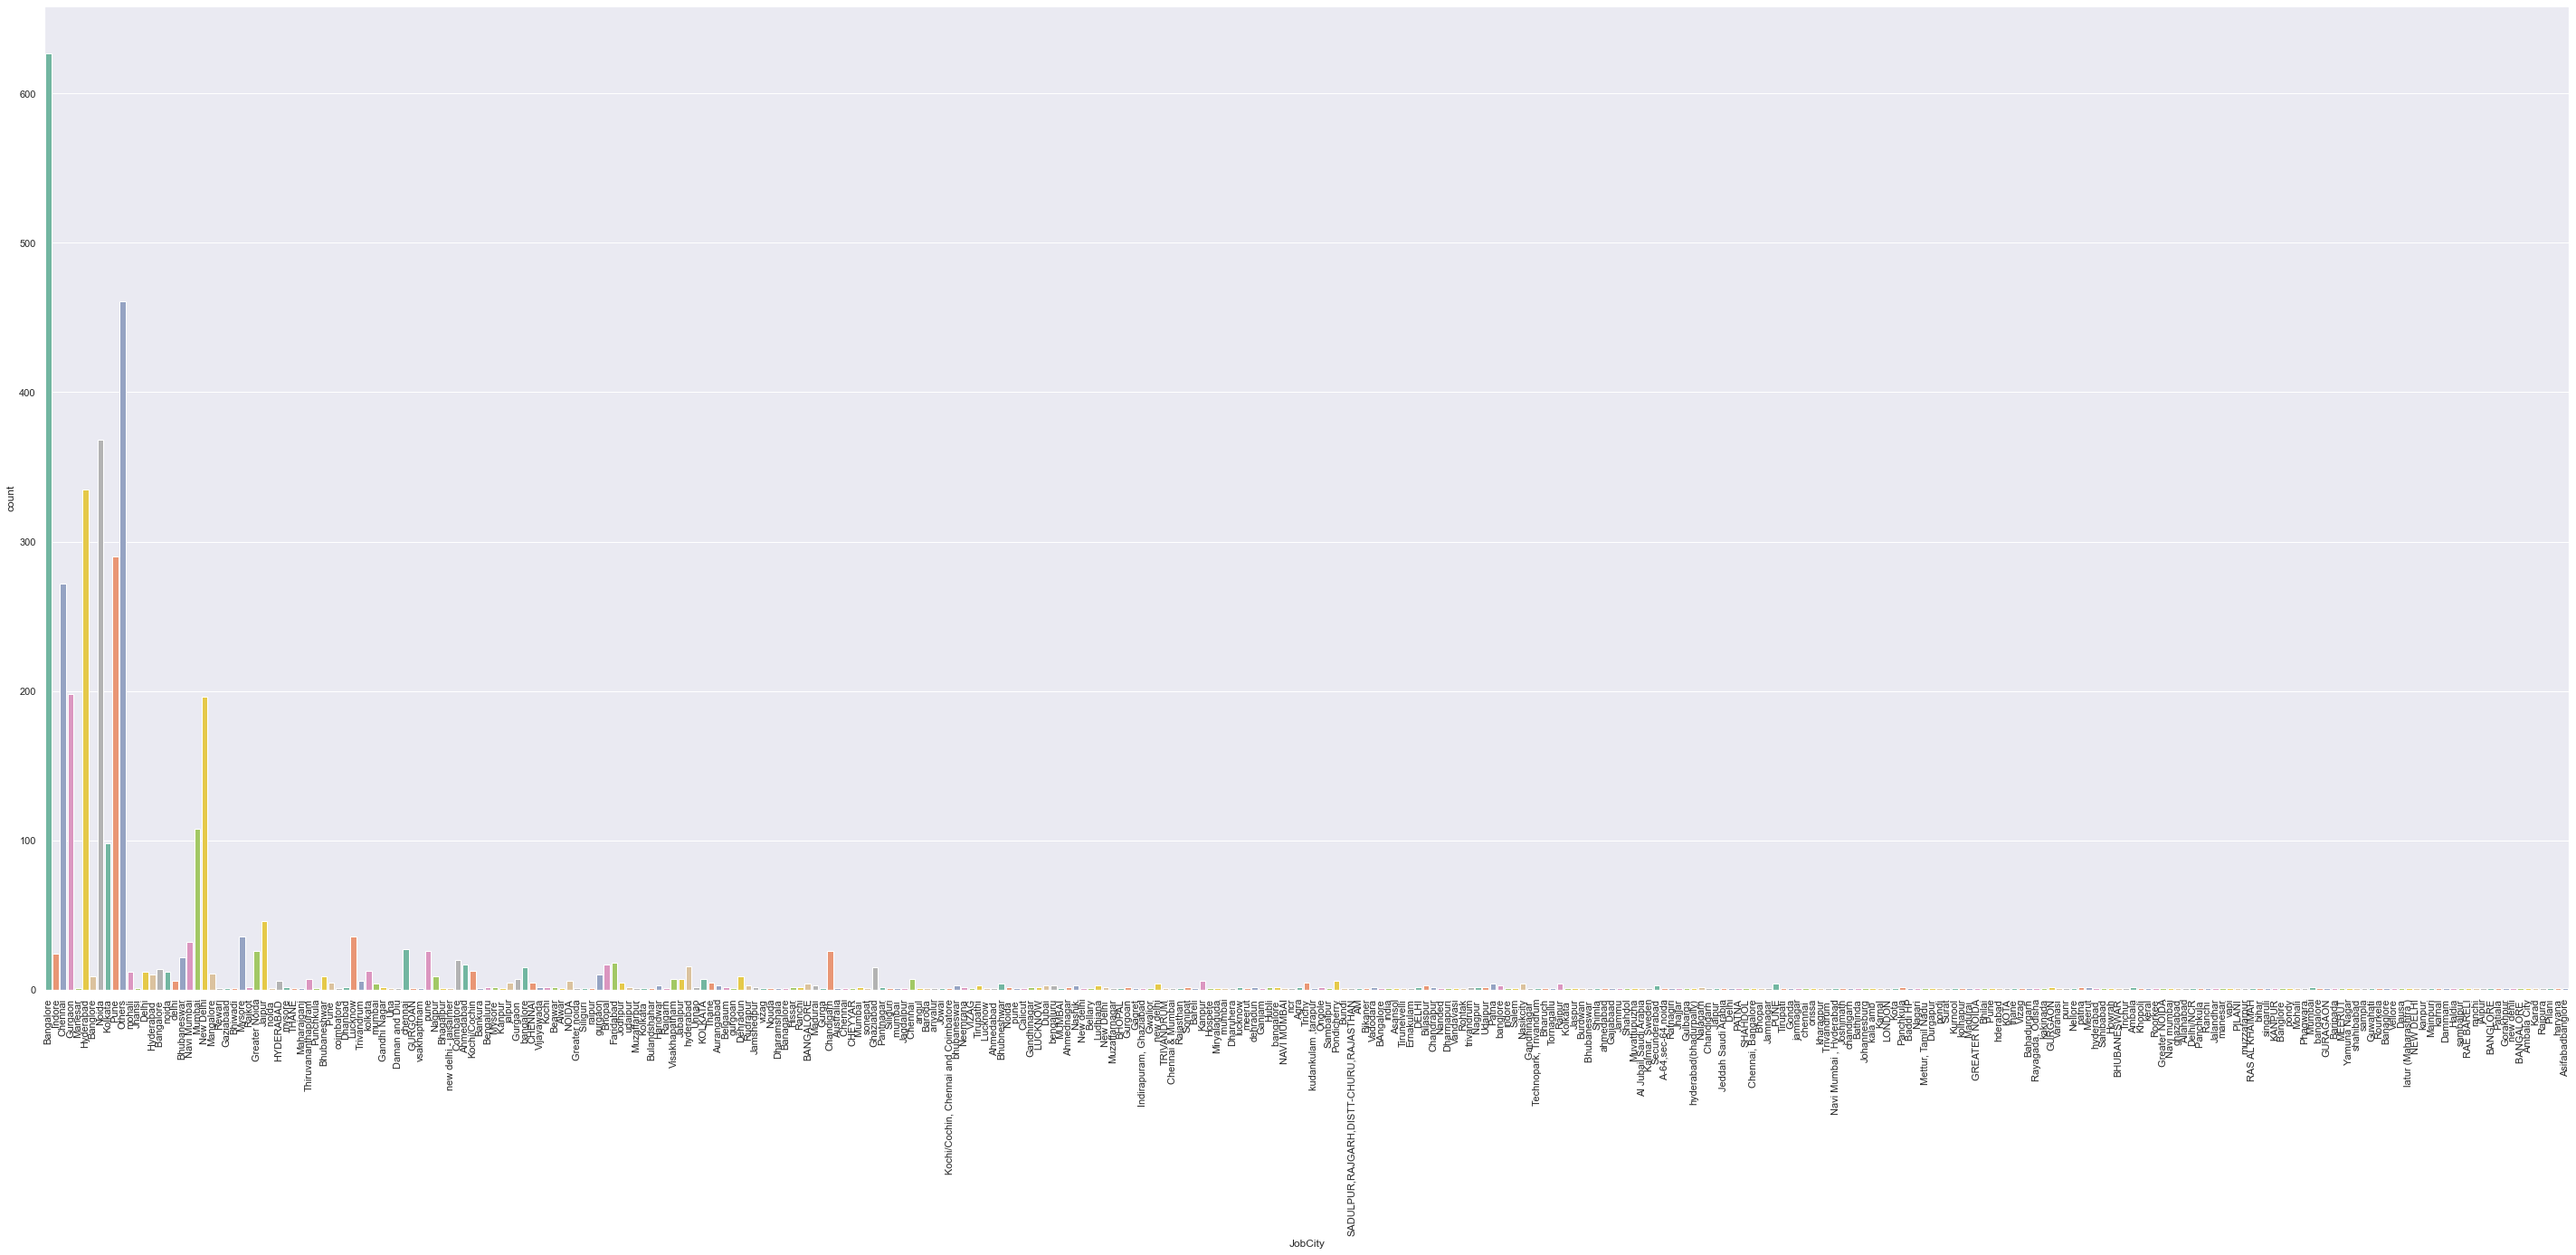

In [52]:
a4_dims = (50,20)
fig, ax = plt.subplots(figsize=a4_dims)
l = sns.countplot(data=df, x='JobCity', palette='Set2')
l.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Observation

- The graph is right skewed and need to be normalized.
- Column has so many outliers with a large range of unique values.
- The outlier value is extremely low till end.

### Bivariate Analysis

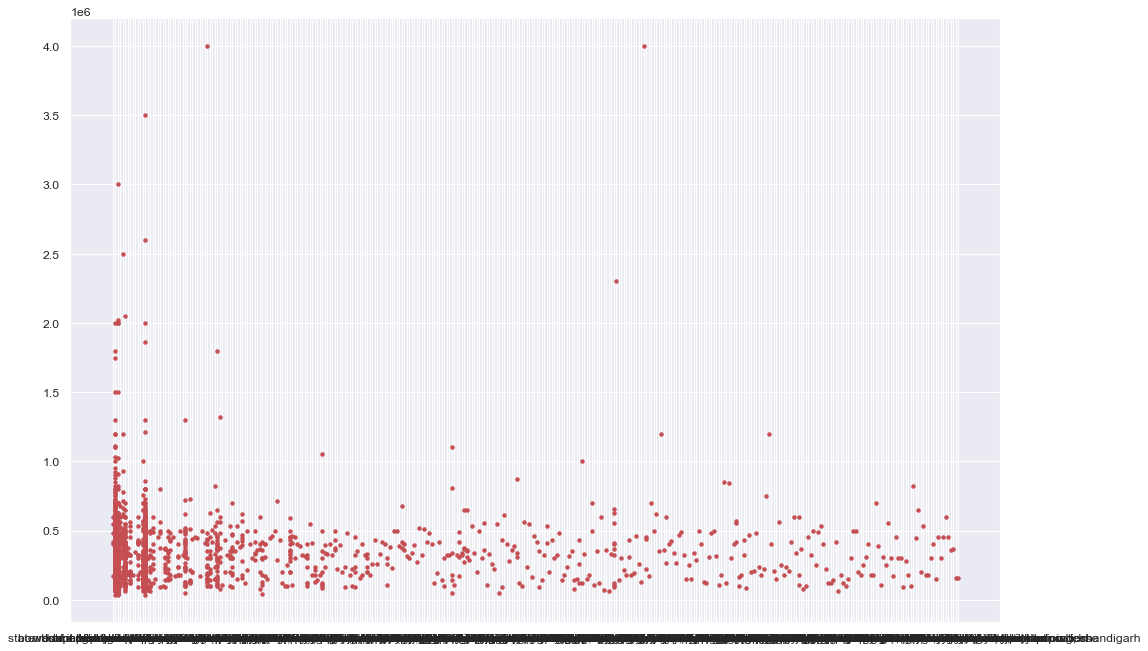

In [53]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['12board'], df['Salary'], 'r.')
plt.show()

#### Observation

- This plot show the relation between the 12board and salary.
- Through this graph we can easily observe the impact of 12 grade on the salary of a candidate.

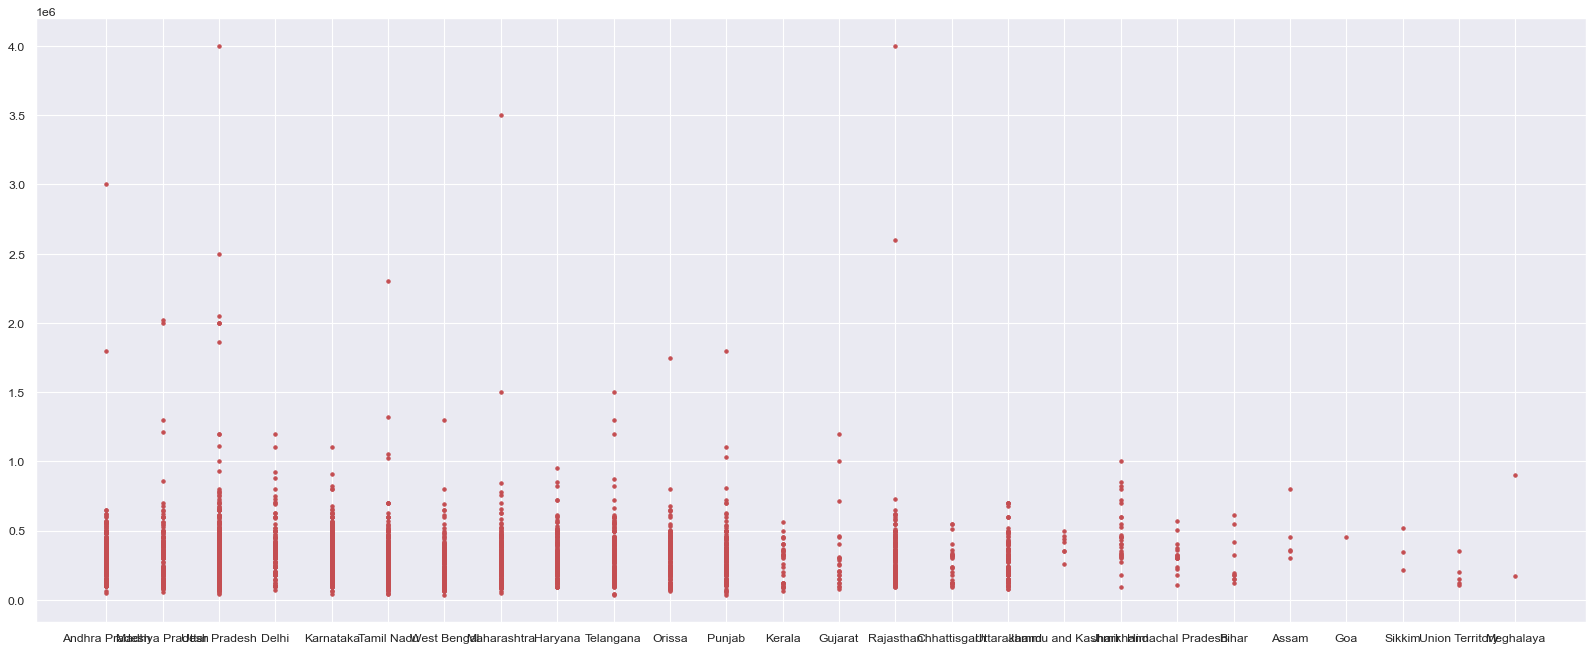

In [54]:
figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['CollegeState'],df['Salary'], 'r.')
plt.show()

#### Observation

- This plot show the relation between the collegeState and salary.
- Through this graph we can easily observe the impact of collegeState on the salary of a candidate.

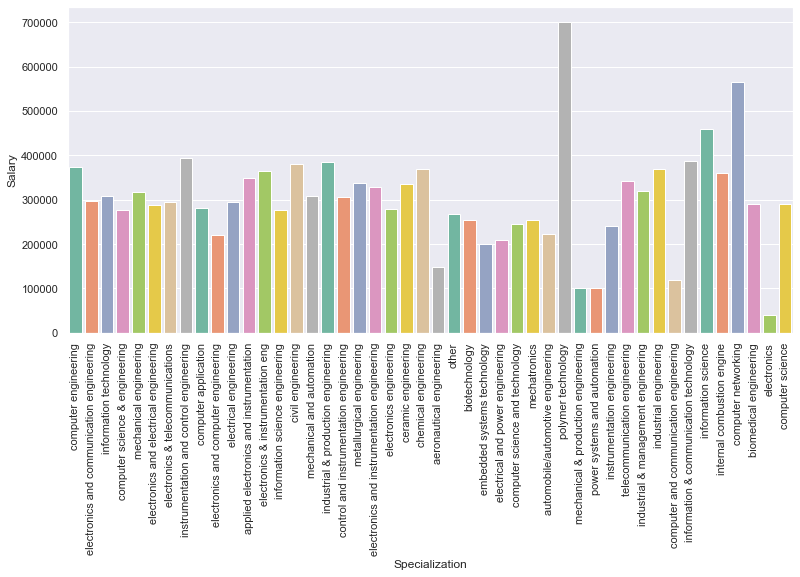

In [55]:
a4_dims = (13,6)
fig, ax = plt.subplots(figsize=a4_dims)
f = sns.barplot(data=df, x = 'Specialization', y='Salary', ci=None, palette='Set2')
f.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Observation

- This bar plot show the relation between the Specialization and salary.
- Through this graph we can easily observe the impact of Specialization on the salary of a candidate.
- The above barplot show the effect of a candidate's specialization on his/her salary.

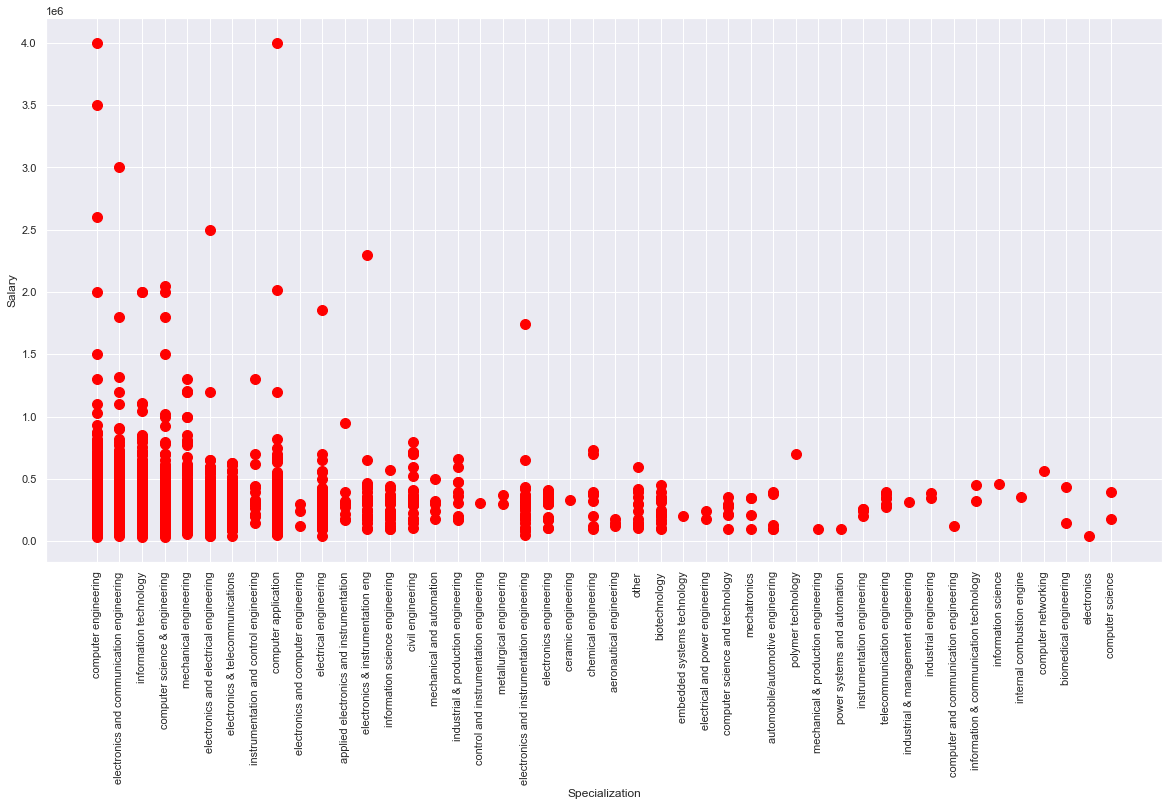

In [56]:
df.plot.scatter(x='Specialization', y='Salary', s=100, c='red', rot=90)
plt.show()

#### Observation

- This scatterplot also shows the relation between the Specialization and salary.
- Through this graph we can easily observe the impact of Specialization on the salary of a candidate.
- The above barplot show the effect of a candidate's specialization on his/her salary.

In [57]:
p_p_df = df[['collegeGPA','CollegeTier','CollegeCityTier','JobCity','Specialization','10percentage','12percentage','Salary']]

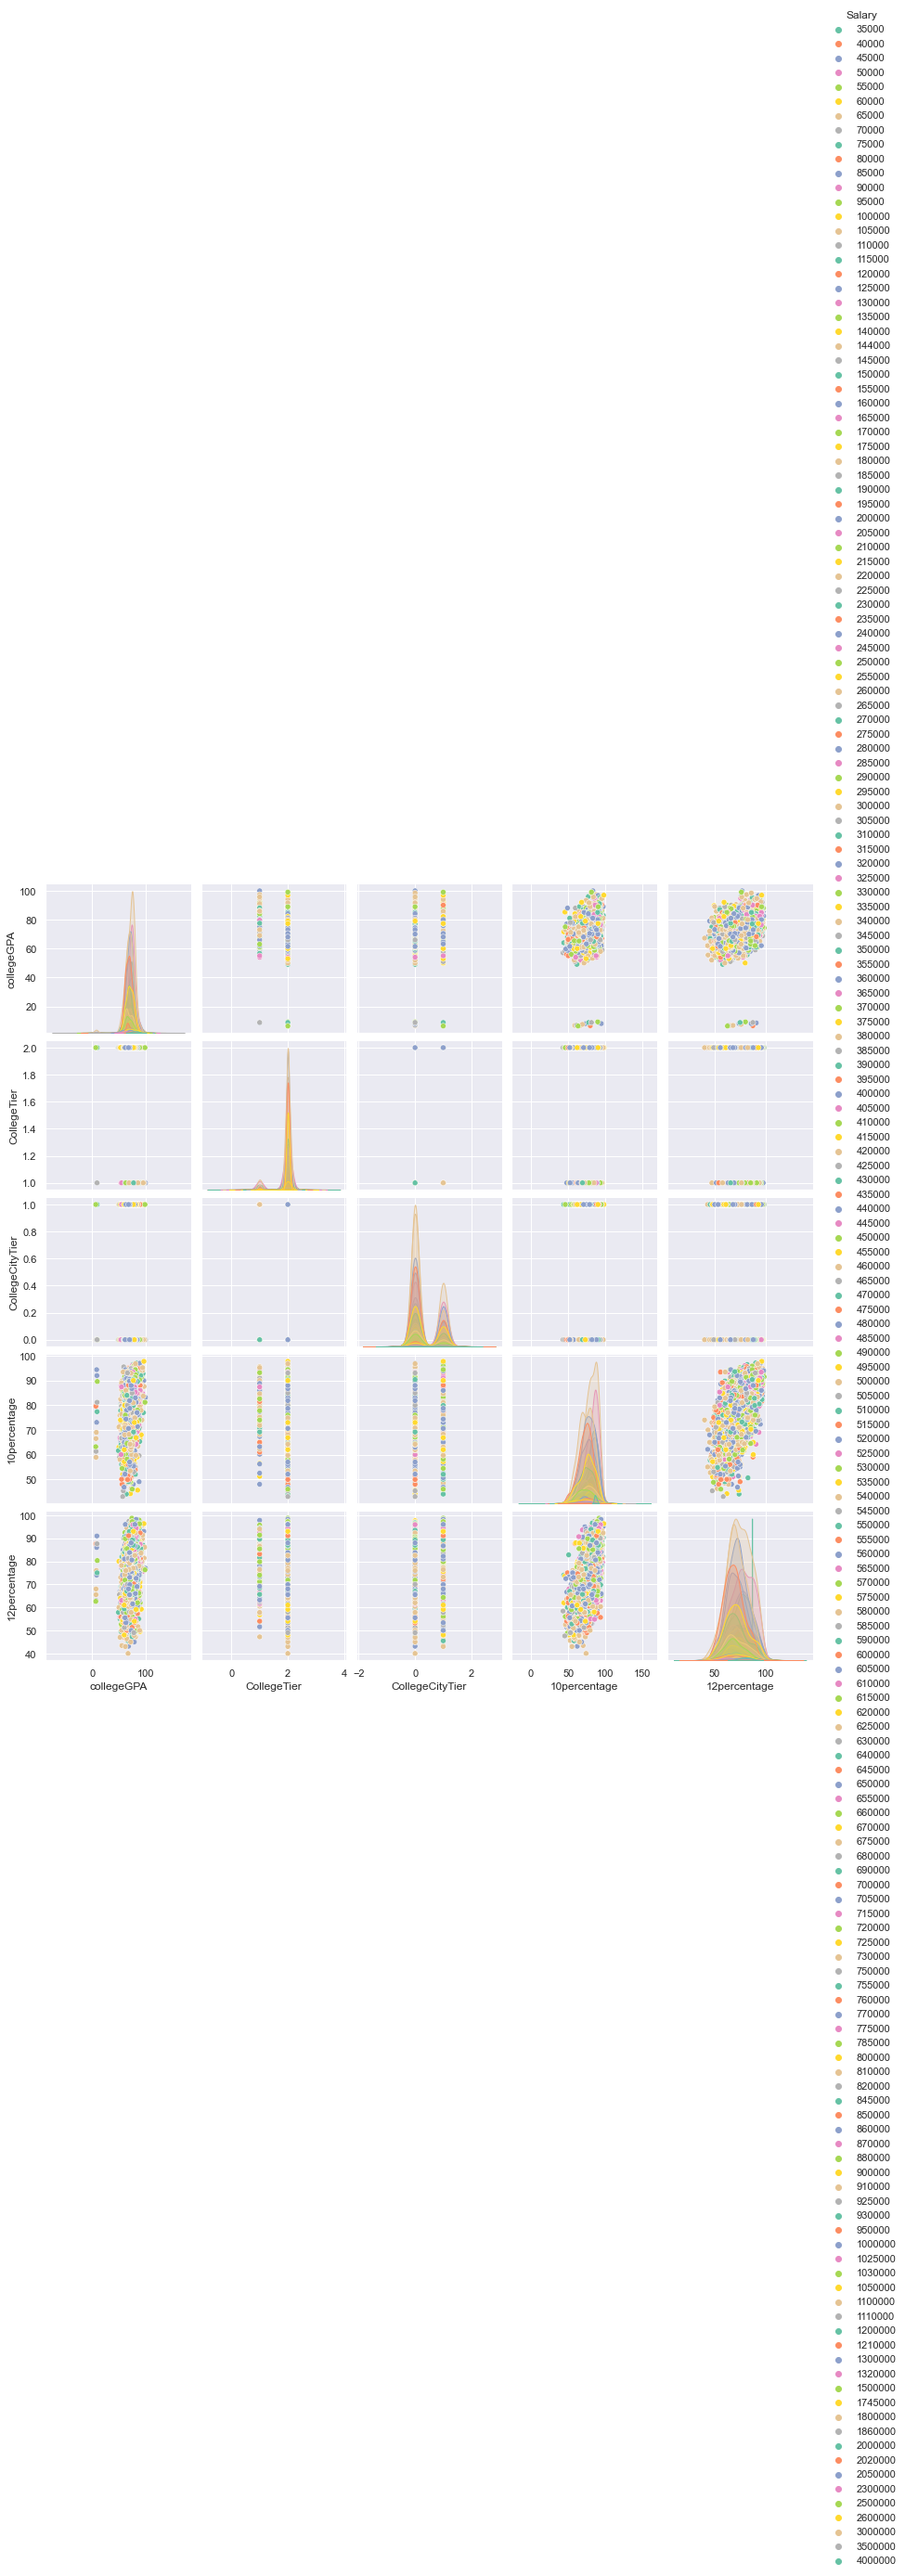

In [58]:
sns.pairplot(data=p_p_df,  hue='Salary', palette='Set2')
plt.show()

#### Observation

- Pairplot shows the different variety of graph plotting used for showing different columns relationships.
- It shows the pair wise relationships of respective given columns.
- This is used to take best suited variables to build Machine Learning Model.

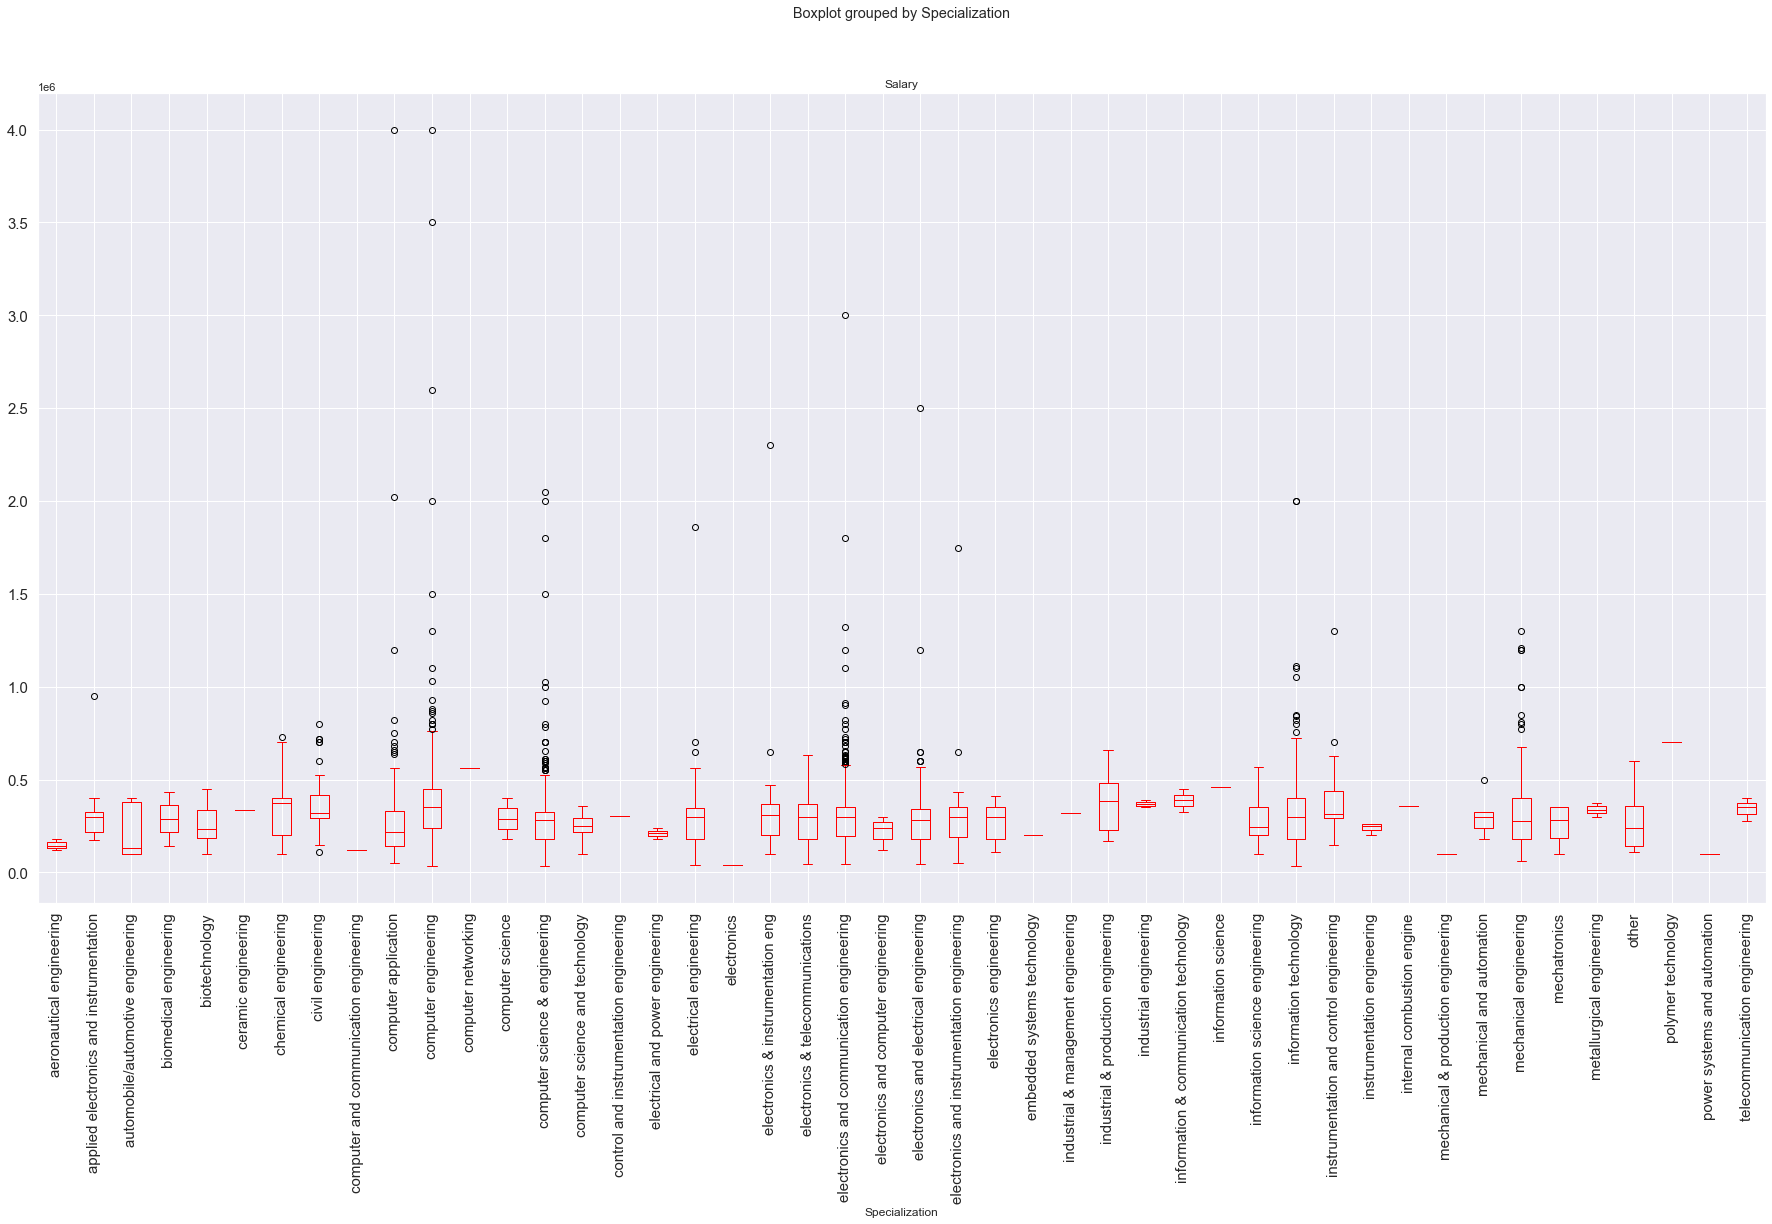

In [59]:
df.boxplot(rot=90, fontsize=15, figsize=(30,15), by='Specialization', column=['Salary'], color='red')
plt.show()

#### Observation

- Boxplot shows the different observations of different rows.
- It shows the records to all the other respective row values.

### Research Questions

<span style="color:gray">Times of India article dated Jan 18, 2019 states that After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate. Test this claim with the data given to you.</span>

<span style="color:gray">Claiming here that the candidates who had done Computer Science Engineering and took jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5LPA to 3LPA as a fresh graduate.</span>

<h2>$ Null Hypothesis (H_0) : H_0 \ge 3L $ </h2>

<h2>$ AlternateHypothesis (H_1) : H_1 < 3L $</h2>

In [60]:
df['DOJ']=pd.to_datetime(df['DOJ'])
# sample data
data=df[ (df.Specialization =='computer science & engineering') & (df.Salary >=250000) & (df.Salary<=300000) & 
        (df['DOJ'].dt.year == df['GraduationYear']) & ((df.Designation=='software engineer')  | 
                                                       (df.Designation=='programmer analyst')| 
                                                       (df.Designation=='associate software engineer')|
                                                       (df.Designation=='hardware engineer'))] 

In [61]:
data[['DOJ','GraduationYear']] 

,DOJ,GraduationYear
55,2014-08-01,2014
499,2014-11-01,2014
978,2014-07-01,2014
1003,2013-09-01,2013
1224,2014-08-01,2014
1300,2014-12-01,2014
1653,2013-12-01,2013
1868,2014-12-01,2014
2132,2014-08-01,2014
2650,2014-09-01,2014


In [62]:
# sample mean of salary 
np.mean(data['Salary'])

290263.15789473685

In [63]:
data['Salary'].size

19

In [64]:
statistics.pstdev(df['Salary'])

212710.89280273343

In [65]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [66]:
# Defining the sample and population parameters

sample_mean = 290263.15789473685
sample_size = 19
pop_mean = 307699.8499249625 
pop_std = 212710.89280273343

In [67]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)
z

-0.35731493327838626

In [68]:
# function for calculation of t_score 

def tscore(sample_mean, pop_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denominator = sample_std/sample_size**0.5
    return numerator/denominator

In [69]:
sample_std = np.std(data.Salary)
sample_std

16501.489901674613

In [70]:
t_sc = tscore(sample_mean,pop_mean, sample_std,sample_size)
t_sc

-4.605934307888254

In [71]:
# one tail test
confidence_level = 0.9
alpha = 1-0.95
t_critical = t.ppf(1-alpha, df=18)
t_critical

1.7340636066175354

In [72]:
# Two Tail - Calculating the z-critical value
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha/2)
z_critical

1.6448536269514722

In [ ]:
x_min = 230000
x_max = 350000

mean = pop_mean
sample_std = sample_std/(sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)
plt.plot(x, y)


t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='purple')

plt.scatter(sample_mean, 0)
plt.axvline(mean, color='orange')
plt.annotate('x_bar', (sample_mean, 0.0007))
plt.figure(figsize=(20,10))
plt.show()


# In this case sample mean falls in the rejection region

# i.e. we Reject Null Hypothesis

In [ ]:
# Ploting the sampling distribution with acceptance regions

# Defining the x minimum and x maximum
x_min = 230000
x_max = 350000


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
sample_std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean + (-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(mean, color = 'black')
plt.annotate("x_bar", (sample_mean, 0.0005))
plt.figure(figsize=(20,10))
plt.show()

# In this case sample mean raises in the acceptance region
# i.e. here we fail to reject the Null Hypothesis


#### Observation

- The above graphs show the proves to claim the researches as true or false.
- We can see that the z-test claim that the research is true but on the otherhand t-test claim that the research is false. - The observation must be faulty due to some fluctuate values.

In [ ]:
# Conclusion using t test

if(np.abs(t_sc) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

In [ ]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

#### Observation

- As the result of the hypothesis testing we see that the claim is false.
- For this claim Null Hupothesis fails but alternate hypothesis passed.
- The t-test and probability value i.e.,p_value claiming it as wrong.

<h4>Is there a relationship between gender and specialisation?</h4> (i.e. Does the preference of Specialisation depend on the Gender?)
<h2>$ Null Hypothesis (H_0) : $ Variables are independent. </h2>
<h2>$ AlternateHypothesis (H_1) : $ Variables are dependent.</h2>

In [ ]:
df.groupby(by=['Gender','Specialization']).count()['ID']

In [ ]:
x = np.linspace(0,100, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

In [ ]:
obsr = pd.crosstab(df.Specialization,df.Gender)
obsr

In [ ]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(obsr)

In [ ]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(obsr)[0]
pval = chi2_contingency(obsr)[1]
data = chi2_contingency(obsr)[2]

In [ ]:
confidence_level = 0.95

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, data)

chi2_critical

In [ ]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='green')

In [ ]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

In [ ]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

#### Observation

- As the result of the second research question we see that there is a relationship between Gender and specialization.
- We test this claim through Chi-Square test and find the result that both the categorical variables are dependent on each other.
- Some specialization or working field does not allow some candidates to work in that field due to some risks.

<h2><i>Conclusion</i></h2><ul><li>One have to deal with outliers as all the columns in the given data having a large number of outliers.</li><li>Have to find the relationships between the columns on which we have to give conclusion.</li><li>Data cleaning is much needed.</li><li>Columns need to be corrected whose having mixed values like string and datetime and integers.</li><li>Data column names should be changed for better understanding.</li><li>Some categorical and numerical clumns are dependent on each other.</li><li>We need to encode categorical columns for further processes.</li></ul>